In [1]:
from Common.Core.CustomLayers.Activations.Laplace import LaplaceActivation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn


# 设置不同的参数 (a, b) 并绘制对应的曲线
def plot_laplace_activation(parameters):
    x = np.linspace(-10, 10, 400)
    x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)

    for idx, (a_value, b_value) in enumerate(parameters):
        model = LaplaceActivation(features=1, bias=(b_value is not None))
        model.a = nn.Parameter(torch.tensor([a_value], dtype=torch.float32))
        if b_value is not None:
            model.b = nn.Parameter(torch.tensor([b_value], dtype=torch.float32))

        with torch.no_grad():  # 禁用梯度计算
            y_tensor = model(x_tensor)
        y = y_tensor.numpy().flatten()

        label = f'a={a_value}, b={b_value if b_value is not None else 0}'
        plt.plot(x, y, label=label)

    plt.xlabel('x')
    plt.ylabel('Activation Value')
    plt.title('Laplace Activation Function')
    plt.legend()
    plt.grid(True)
    plt.show()


# 不同的参数设置
params = [
    (1, 0),
    (1, 1),
    (1.5, 0.5),
    (2, -0.5),
    (0.5, -1)
]

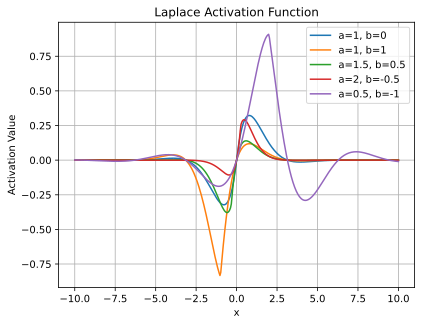

In [4]:
import d2l.torch as d2l

d2l.use_svg_display()
plot_laplace_activation(params)

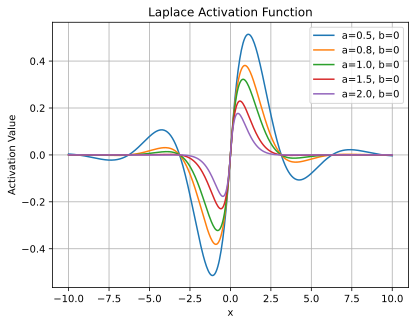

In [5]:
params2 = [
    (0.5, 0),
    (0.8, 0),
    (1.0, 0),
    (1.5, 0),
    (2.0, 0)
]
plot_laplace_activation(params2)

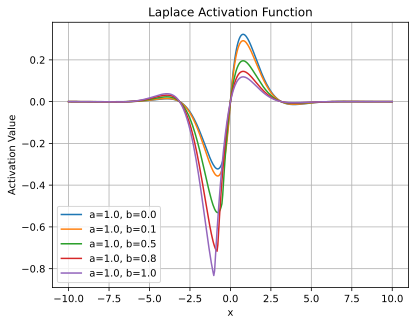

In [6]:
params3 = [
    (1.0, 0.0),
    (1.0, 0.1),
    (1.0, 0.5),
    (1.0, 0.8),
    (1.0, 1.0)
]
plot_laplace_activation(params3)

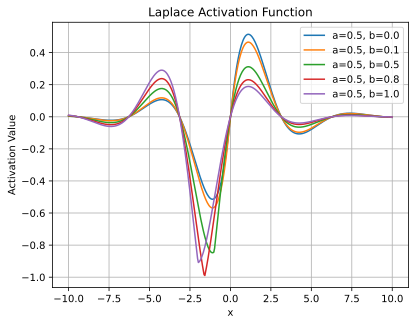

In [8]:
params4 = [
    (0.5, 0.0),
    (0.5, 0.1),
    (0.5, 0.5),
    (0.5, 0.8),
    (0.5, 1.0)
]
plot_laplace_activation(params4)

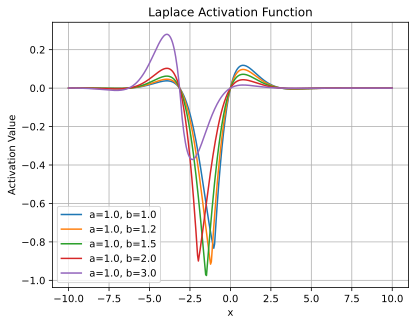

In [9]:
params5 = [
    (1.0, 1.0),
    (1.0, 1.2),
    (1.0, 1.5),
    (1.0, 2.0),
    (1.0, 3.0)
]
plot_laplace_activation(params5)

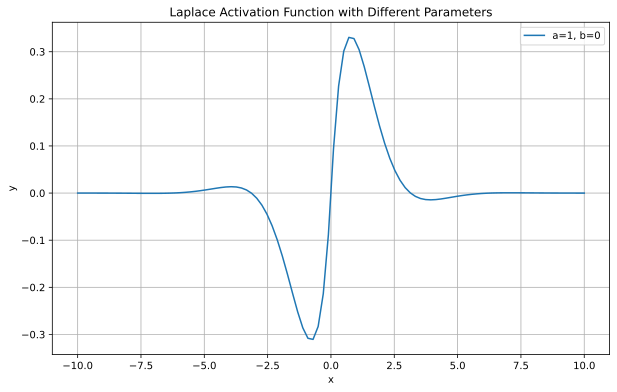

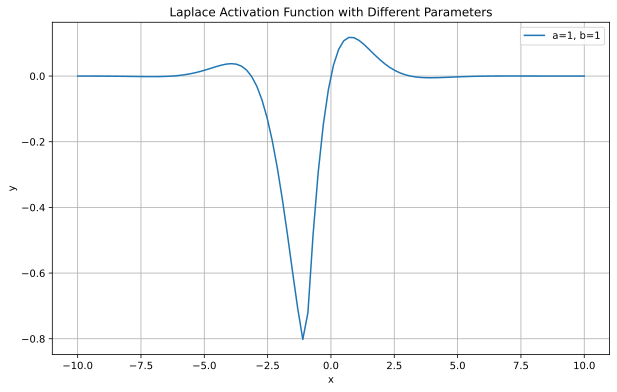

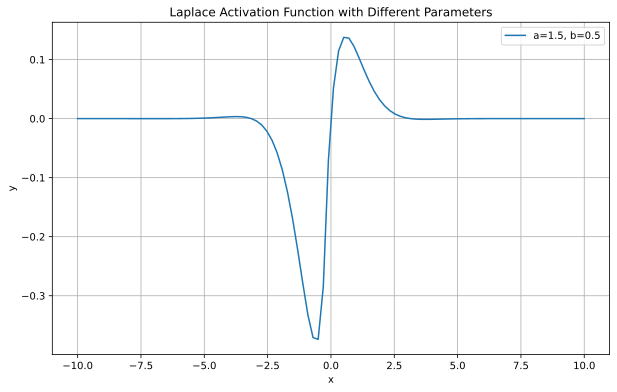

In [10]:
# 修正参数设置，确保使用浮点数类型的张量
def plot_laplace_activation(a, b):
    laplace_activation = LaplaceActivation(1, bias=True)
    laplace_activation.a.data = torch.tensor(a, dtype=torch.float)
    if b:
        laplace_activation.b.data = torch.tensor(b, dtype=torch.float)

    x = torch.linspace(-10, 10, 100)
    y = laplace_activation(x.unsqueeze(1))

    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label=f"a={a}, b={b}")
    plt.title("Laplace Activation Function with Different Parameters")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

# 重新绘制不同参数设置下的曲线
param_sets = [(1, 0), (1, 1), (1.5, 0.5)]
for a, b in param_sets:
    plot_laplace_activation(a, b)
plt.show()